**Importing dependencies**

In [101]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

**Data Collection**

In [102]:
# Loading the dataset into a pandas dataframe
insurance_df = pd.read_csv("insurance.csv")

In [103]:
# Printing the first five rows of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
# Getting the number of rows and columns of the dataset
insurance_df.shape

(1338, 7)

In [105]:
# Getting some basic info about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [106]:
# Checking for null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [107]:
# Statistical measure of the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Data Visualization**

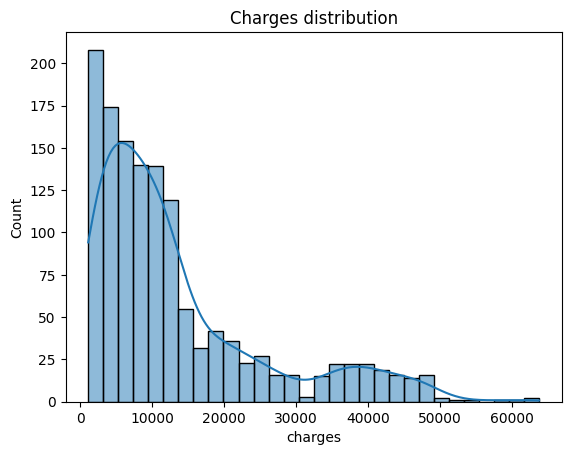

In [108]:
# Charges distribution
sns.histplot(data=insurance_df, x="charges", bins=30, kde=True)
plt.title("Charges distribution")
plt.show()

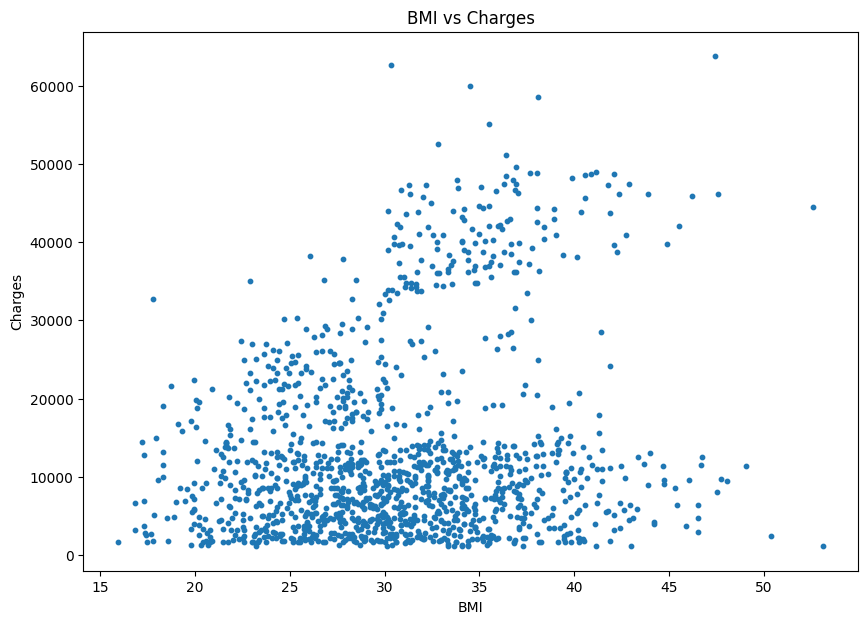

In [109]:
# BMI vs Charges distribution
plt.figure(figsize=(10,7))
plt.scatter(insurance_df["bmi"], insurance_df["charges"], s=10)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show()

In [110]:
# Age distribution
def ageRange(age):
    if age < 18:
        return "Child"
    elif 18 <= age < 35:
        return "Youth"
    elif 35 <= age < 50:
        return "Adult"
    else:
        return "Elder"
    
insurance_df["Age Range"] = insurance_df["age"].apply(ageRange)

age_range = insurance_df["Age Range"].value_counts().reset_index(name="count")
# Creating a bar chart illustrating the age range distribution
px.bar(age_range, x="index", y="count", title="Age range distribution", color="index")

In [111]:
# Getting the number of smokers based on gender
smoker_sex = insurance_df.groupby("sex")["smoker"].value_counts().reset_index(name="count")
smoker_sex

,sex,smoker,count
0,female,no,547
1,female,yes,115
2,male,no,517
3,male,yes,159


In [112]:
# Constructing a grouped bar chart illustrating the number of smokers based on gender
px.bar(smoker_sex, x="smoker", y="count", color="sex", title="Chart illustrating the number of smokers based on gender", barmode="group")

In [113]:
# Getting the number of children
no_children = insurance_df["children"].value_counts().reset_index()
no_children["selected_children"] = "Medical insurance of children" + "(" + no_children["index"].astype(str) + ")"
# Constructing a pie chart
px.pie(no_children, values="children", names="selected_children", color="index", title="Number of selected children for medical insurance")

In [114]:
# Getting the number of males and females in each region
sex_region = insurance_df.groupby("sex")["region"].value_counts().reset_index(name="count")
sex_region

,sex,region,count
0,female,southeast,175
1,female,northwest,164
2,female,southwest,162
3,female,northeast,161
4,male,southeast,189
5,male,northeast,163
6,male,southwest,163
7,male,northwest,161


In [115]:
# Constructing a horizontal chart 
px.bar(sex_region, x="count", y="region", color="sex", title="Gender distribution in each region", barmode="group")

**Correlation**

In [116]:
corr = insurance_df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


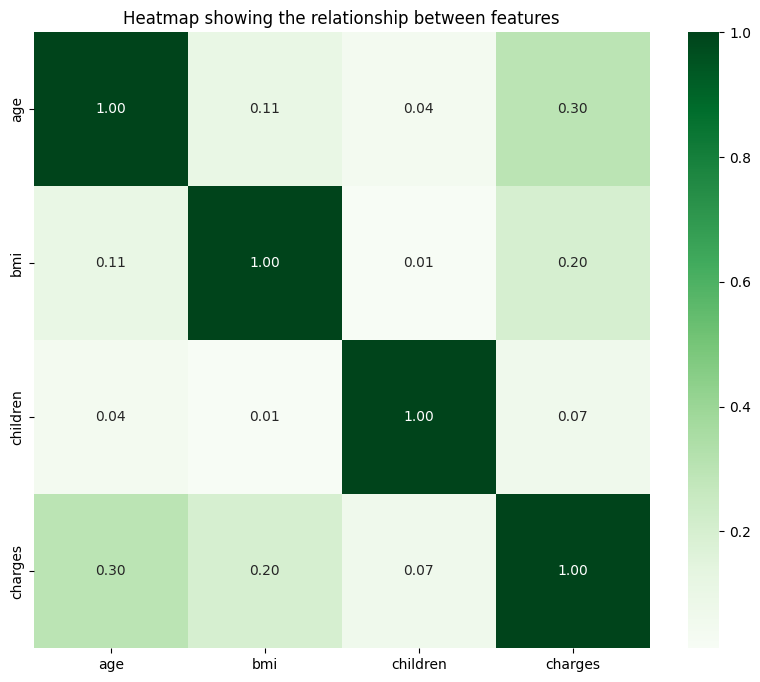

In [117]:
# Constructing a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cbar=True, square=True, fmt=".2f", cmap="Greens")
plt.title("Heatmap showing the relationship between features")
plt.show()

**Encoding**

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [119]:
# Load the encoders and scalers
ord_encoder = OneHotEncoder()
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
scaler = StandardScaler()

In [120]:
# Separating the data into features and target
X = insurance_df.drop(columns=["charges", "Age Range"], axis=1) # Features
Y = insurance_df["charges"] # Target

In [121]:
# Identifying categorical and numeric columns
categorical_col = X.select_dtypes(include=["object"]).columns
numeric_col = X.select_dtypes(include=["number"]).columns

In [122]:
# Getting binary columns and multi columns
binary_col = [col for col in categorical_col if X[col].nunique() == 2]
multi_col = [col for col in categorical_col if X[col].nunique() > 2]

In [123]:
# Using the column transformer to create a preprocessor to host the encoders and scalers
preprocessor = ColumnTransformer(
    transformers=[
        ("OrdinalEncoder", ord_encoder, binary_col),
        ("OneHotEncoder", ohe, multi_col),
        ("StandardScaler", scaler, numeric_col)
    ],
    remainder="passthrough"
)

In [124]:
# Printing the preprocessor
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OrdinalEncoder', OneHotEncoder(),
                                 ['sex', 'smoker']),
                                ('OneHotEncoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['region']),
                                ('StandardScaler', StandardScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object'))])

**Train Test Split**

In [125]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [126]:
# Getting the shape of training and test data
print(X_train.shape, X_test.shape, X.shape)

(1070, 6) (268, 6) (1338, 6)


**Model Evaluation**

In [127]:
# Loading the models into a list
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
model_list = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

In [128]:
# Creating a pipeline to fit the models and make predictions based on performance matrics to select the best model 
for model in model_list:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressors", model)
    ])
    pipeline.fit(X_train, Y_train)
    Y_pred = pipeline.predict(X_test)
    # Model evaluation based on R^2 score
    r2_score = round(metrics.r2_score(Y_test, Y_pred), 3)
    print(f"Model: {model}\nR^2 score: {r2_score}\n")

Model: LinearRegression()
R^2 score: 0.745

Model: Lasso()
R^2 score: 0.745

Model: Ridge()
R^2 score: 0.745

Model: DecisionTreeRegressor()
R^2 score: 0.722

Model: RandomForestRegressor()
R^2 score: 0.842

Model: KNeighborsRegressor()
R^2 score: 0.706



**Based on the performance metrics, RandomForestRegressor came out as the best performed model**

In [129]:
# Loading the best model for prediction
rfr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
])
# Fitting the model
rfr.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OrdinalEncoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'smoker']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

**Making a predictive system**

In [130]:
# Define input data
input_data = (32,"male",28.88,0,"no","northwest")
# Convert to a dataframe
input_df = pd.DataFrame([input_data], columns=X.columns)
# Making predictions
prediction = rfr.predict(input_df)
print(f"Predictive result: {prediction[0]}")

Predictive result: 3824.8404299999966


**Saving the model**

In [131]:
import joblib
joblib.dump(rfr, "model.pkl")

['model.pkl']

In [132]:
# Saving the column names
joblib.dump(X.columns.tolist(), "X_columns.pkl")

['X_columns.pkl']